In [3]:
import numpy as np
import pandas as pd

np.random.seed(87)

%matplotlib inline

# 1. How likely is it that you roll doubles when rolling two dice?

In [4]:
sides=6
p_1side = 1/6
p_1side**2

0.027777777777777776

In [5]:
6/36

0.16666666666666666

In [9]:
trial_count = 10_000
dice_count = 2
outcomes = [1,2,3,4,5,6]

# rules setup
dice_rolls_2 = np.random.choice(outcomes, (trial_count, dice_count))

# convert to pandas dataframe
dice_rolls_2 = pd.DataFrame(dice_rolls_2)

dice_rolls_2.head(8)

,0,1
0,2,6
1,2,5
2,4,4
3,4,3
4,6,3
5,6,1
6,4,3
7,4,6


In [10]:
# doubles rolls @ 10,000 try's
doubles_count = dice_rolls_2.apply(lambda row: row[0] == row[1], axis=1).sum()
print(doubles_count)

1701


In [14]:
(dice_rolls_2[0] == dice_rolls_2[1])

0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Length: 10000, dtype: bool

In [258]:
# probability notation
doubles_probability = doubles_count/len(dice_rolls_2)
print(doubles_probability)
doubles_probability.mean()

0.1689


0.1689

# 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [270]:
n_sims = 100_000
n_coins = 8
outcomes = ['h','t']
coinflips = np.random.choice(outcomes,size=(n_sims, n_coins))

In [271]:
flips_sim = (coinflips == 'h').sum(axis=1)
flips_sim

array([4, 5, 7, ..., 3, 0, 5])

In [272]:
(flips_sim>3).mean()

0.63535

In [273]:
(flips_sim == 3).mean()

0.21885

#### SETUP

1/2 * 1/2 * 1/2
1/8

In [71]:
trial_count = 10_000
coin_count = 8

flips = np.random.choice(["head","tail"], (trial_count, coin_count))
flips = pd.DataFrame(flips)

#### TESTING

In [72]:
flips.head(2)

,0,1,2,3,4,5,6,7
0,head,tail,tail,tail,tail,tail,tail,head
1,head,head,tail,head,head,head,head,tail


In [73]:
def count_heads(row):
    heads_count = 0
    for cell in row:
        if cell == "head":
            heads_count += 1
    return heads_count

In [80]:
count_heads_test = flips.apply(count_heads,axis=1)
print(count_heads_test.head(3))

0    2
1    6
2    5
dtype: int64


In [84]:
count_all_heads_test = count_heads_test.apply(lambda row: row == 3).sum()
print(count_all_heads_test)

2264


#### ANSWERS

In [76]:
# Exactly 3 heads
three_heads_count = flips.apply(count_heads,axis=1).apply(lambda row: row == 3).sum()
print(three_heads_count)

# probability notation
three_heads_probability = three_heads_count = flips.apply(count_heads,axis=1).apply(lambda row: row == 3).mean()
print(three_heads_probability)

2264
0.2264


In [ ]:
# More than 3 heads
p_more_than_three_heads = flips.apply(count_heads,axis=1).apply(lambda row: row > 3).mean()

In [ ]:
# 3 Heads in a row?????

# 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

### Class answer

In [278]:
n_sims = 100_000
outcomes = ['wd','wd','wd','ds']
n_billboards = 2
billboards = np.random.choice(outcomes, size=(n_sims,n_billboards))

In [279]:
billboards

array([['wd', 'ds'],
       ['wd', 'ds'],
       ['wd', 'ds'],
       ...,
       ['wd', 'ds'],
       ['wd', 'ds'],
       ['wd', 'wd']], dtype='<U2')

In [280]:
outcomes = ['wd','ds']

In [281]:
billboards2 = np.random.choice(outcomes,size=(n_sims, n_billboards),p=[.75,.25])

In [282]:
billboards2

array([['wd', 'wd'],
       ['wd', 'wd'],
       ['wd', 'ds'],
       ...,
       ['wd', 'wd'],
       ['wd', 'ds'],
       ['wd', 'wd']], dtype='<U2')

In [ ]:
(billboards2 == 'ds').sum(axis=1)

In [283]:
prob = ((billboards=='ds').sum(axis=1)==2).mean()

In [284]:
prob

0.0604

In [50]:
data_science = 1
web_dev = 3

total_cohorts = data_science+web_dev
data_science_percent = 1/total_cohorts

n_times = 100_000
n_billboards = 2

weighted_sim_ds = np.random.random((n_times,n_billboards)) <= data_science_percent
weighted_sim_ds_df = pd.DataFrame(weighted_sim_ds)

weighted_sim_ds_df

ds_billboard_twice = weighted_sim_ds_df.apply(lambda row: row[0] and row[1] == True, axis=1).mean()
ds_billboard_twice

0.06153

# 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. 
# If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? 
# (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

### Class Answer

In [286]:
mean = 3
sd = 1.5
n_days = 5

In [287]:
pop_per_day = np.random.normal(mean,sd,size=(n_sims, n_days))

In [288]:
pop_per_day

array([[ 1.86351839,  3.268102  ,  3.06196311,  5.95849747,  2.6280841 ],
       [ 2.53787674, -1.49883463,  5.62882676,  1.9275391 ,  2.23976596],
       [ 5.39904631,  2.18105271,  0.50428401,  2.76613587,  5.58264171],
       ...,
       [ 6.43683029,  1.45889876,  2.13800444,  2.61931571,  0.31538865],
       [ 2.72416529,  5.0085216 ,  2.16290558,  2.36468096,  5.0221426 ],
       [ 3.3884267 ,  3.00231281,  1.88576339,  3.05095113,  3.49276565]])

In [291]:
pop_per_day=pd.DataFrame(pop_per_day)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

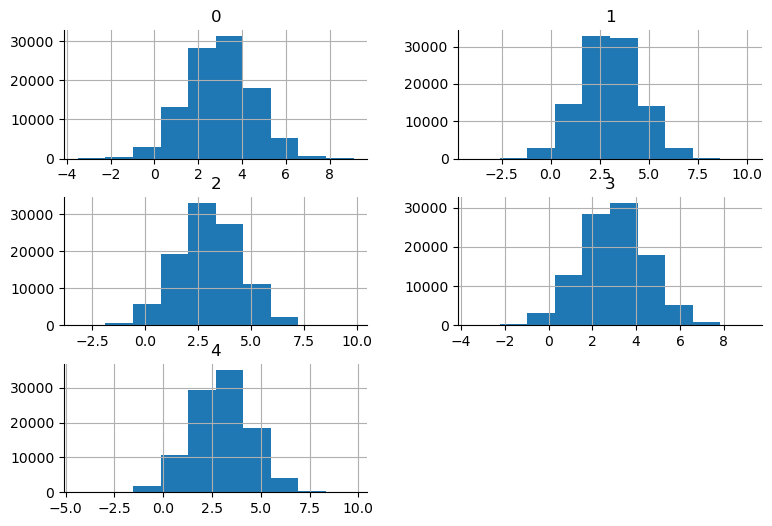

In [296]:
pop_per_day.hist()

In [298]:
(pop_per_week)=pop_per_day.sum(axis=1)
pop_per_week

0        16.780165
1        10.835174
2        16.433161
3        16.910532
4        10.747147
           ...    
99995    13.822405
99996    18.277693
99997    12.968438
99998    17.282416
99999    14.820220
Length: 100000, dtype: float64

In [299]:
(pop_per_week < 17).mean()

0.72376

# Mine

In [127]:
n_instance = 10_000
stock = 17

In [ ]:
daily_consuption = np.random.normal()

In [128]:
daily_consumption = np.random.uniform(1.5,4.5,n_instance)

p_week_consumption = np.random.choice(daily_consumption,(n_instance,5))
p_week_consumption = pd.DataFrame(p_week_consumption)
p_of_within_stock = p_week_consumption.apply(lambda row: row.sum() <= 17, axis=1).mean()

p_of_within_stock

0.835

# 5. Compare Heights
- #### Men have an average height of 178 cm and standard deviation of 8cm.
- #### Women have a mean of 170, sd = 6cm.
- #### Since you have means and standard deviations, you can use np.random.normal to generate observations.
- #### If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [300]:
n_sims = 100_000
men_avg = 178
men_std = 8
women_avg = 170
women_std = 6

height_men = np.random.normal(men_avg,men_std,n_sims)
height_men

array([185.53198412, 183.88173719, 180.6294554 , ..., 193.74605224,
       177.49739383, 179.88389063])

In [301]:
height_women = np.random.normal(women_avg,women_std,n_sims)
height_women

array([171.90076752, 172.62617705, 165.95004556, ..., 175.69051744,
       166.32148854, 179.29564601])

In [303]:
(height_women>height_men).mean()

0.2092

# Mine

In [48]:
n_choices = 10_000

men_height = np.random.normal(178,8,n_choices)
women_height = np.random.normal(170,6,n_choices)

random_height = pd.DataFrame({"men":men_height, "women":women_height})

p_of_taller_woman = random_height.apply(lambda row: row[1] > row[0], axis=1).mean()

# 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- #### What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [304]:
n_sims = 100_000
outcomes = ['s','f']
n_students = 50

In [ ]:
downloads = np.random.choice(outcomes,size=(n_sims, n_students),p=[]
downloads

In [ ]:
(downloads == 's').sum(axis=1)

In [ ]:
((downloads == 's').sum(axis=1) == n_students).mean()

# Mine

In [322]:
failure = 1/250
n_downloads = 50

weighted_sim_dl = np.random.random(n_downloads) < failure

weighted_sim_dl.mean() 

failure = 1/250
n_downloads = 100

weighted_sim_dl = np.random.random(n_downloads) < failure

weighted_sim_dl.mean() 

0.0

- #### What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [308]:
failure = 1/250
n_downloads = 150

weighted_sim_dl = np.random.random(n_downloads) < failure

weighted_sim_dl.mean() 

0.006666666666666667

- #### How likely is it that 450 students all download anaconda without an issue?


In [51]:
failure = 1/250
n_downloads = 150

weighted_sim_dl = np.random.random(n_downloads) <= failure

weighted_sim_dl.mean() 

0.0

# 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [ ]:
[],size=(n_sims,n_days),p=[.3,.7])

In [ ]:
(trucks.sum(axis=1)==0).mean()

In [ ]:
(trucks.sum(axis=1)>=1).mean()

# MINE

In [323]:
food_truck = .70
n_days = 365

In [324]:
no_truck_days = np.random.random(n_days) < food_truck
no_truck_days = pd.DataFrame(no_truck_days)

In [325]:
no_truck_probability = (no_truck_days.sum()/n_days)
print(no_truck_probability)

0    0.69863
dtype: float64


- #### How likely is it that a food truck will show up sometime this week?

In [326]:
truck_days = np.random.random(n_days) > food_truck
truck_days = pd.DataFrame(no_truck_days)
week_truck_probability = ((no_truck_days.sum()/365)/52)
print(week_truck_probability)

0    0.013435
dtype: float64


# 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

#### Rules Setup

In [88]:
trial_count = 10_000
people = 23
birthdays = 365

In [199]:
room_birthdays = birthdays_array = np.random.choice(birthdays, (trial_count, people))

In [200]:
type(birthdays_array)

numpy.ndarray

In [201]:
print(room_birthdays)

[[347 180 208 ... 174  25 221]
 [217 327   8 ... 353 333  13]
 [ 62 142 211 ... 281 315 109]
 ...
 [195  50 156 ... 150 110 208]
 [164 158 245 ... 200  51 101]
 [ 72 133  92 ... 258 254 230]]


In [202]:
# convert to pandas dataframe
room_birthdays = pd.DataFrame(room_birthdays)

pandas.core.frame.DataFrame

In [204]:
a=(room_birthdays.nunique(axis=1) < 23)

In [205]:
type(a)

pandas.core.series.Series

In [206]:
(room_birthdays.nunique(axis=1) < 23).mean()

0.5025

In [207]:
room_birthdays.head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,347,180,208,28,235,64,35,17,227,337,...,307,164,103,302,319,329,78,174,25,221
1,217,327,8,261,252,122,145,282,248,89,...,191,86,111,199,286,268,48,353,333,13
2,62,142,211,122,191,218,177,326,143,256,...,93,333,39,72,265,356,68,281,315,109


In [ ]:
# 10TH ROW
# [0] & [16]

In [210]:
room_birthdays.iloc[10]

0     344
1     150
2      48
3      52
4      68
5     201
6     353
7      77
8     272
9      60
10    313
11    237
12    312
13    192
14    218
15    333
16      2
17    300
18     82
19     23
20     65
21    329
22    333
Name: 10, dtype: int64

In [211]:
print(room_birthdays[16].iloc[10])
print(room_birthdays[0].iloc[10])

2
344


In [212]:
def count_rows(row):
    match_count = 0
    for cell in row:
        if cell == row[0]:
            match_count += 1
    match_count-=1
    return match_count

In [213]:
count_rows_test = room_birthdays.apply(count_rows,axis=1)
count_rows_test.sum()

583

In [214]:
# COMPARE FUNCTION PANDAS DOCS
# ELITE CODE

# TOOLS
# Time it

# [8,2,3,4,3,3,2,6]
# FILTER DOWN

In [215]:
count_rows_test.head(11)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [216]:
birthday_matches = count_rows_test.apply(lambda row: row > 0)

In [217]:
birthday_matches.sum()

569

In [218]:
len(count_rows_test)

10000

In [219]:
more_than_2_matches = count_rows_test.apply(lambda row: row > 1)

In [220]:
more_than_2_matches.sum()

13

In [221]:
for x,y in enumerate(more_than_2_matches):
    if y == True:
        print(x)

174
312
1987
2277
2735
2996
4813
5328
6032
7568
7986
9911
9959


In [222]:
room_birthdays.iloc[601]

0     113
1     194
2     275
3     207
4      87
5      59
6     139
7     108
8     143
9     251
10      3
11    214
12    170
13    290
14    106
15    130
16     31
17    135
18     12
19     94
20     29
21    177
22    310
Name: 601, dtype: int64

In [223]:
more_than_2_matches.sum()

13

# ANSWER

In [336]:
count_rows_test = room_birthdays.apply(count_rows,axis=1)
count_rows_test.mean()

0.0583

# CLASS ANSWER

In [343]:
outcomes=range(1,366)
n_students = 23

birthdays = np.random.choice(outcomes,size=(n_sims, n_students))
birthdays

array([[302, 169, 245, ..., 204, 190, 135],
       [ 35, 275, 364, ..., 126, 326, 166],
       [172, 308, 137, ..., 342, 200,  30],
       ...,
       [189, 228, 323, ..., 260, 312,  35],
       [223, 268,  39, ..., 135, 282,  46],
       [326, 141,  57, ...,  99, 176,  89]])

In [344]:
birthdays = pd.DataFrame(birthdays)

In [345]:
birthdays.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,302,169,245,315,103,32,121,244,188,122,...,28,155,318,1,132,183,288,204,190,135


In [346]:
(birthdays.nunique(axis=1)<n_students).mean()

0.5085